# Numerical Simulation Laboratory

# Numerical exercise 10

## Exercise 11.1
Valuto il comportamento della regressione lineare effettuata tramite la rete neurale variando il numero di epoche, il numero di valori di training e il rumore dei dati di validazione. Per questo esercizio utilizzo una rete neurale semplice composta da un singolo neurone come nell'esempio riportato nel *notebook* relativo all'undicesima esercitazione.

### <font color='blue'> Epoche </font> 
Valuto il comportamento della regressione lineare variando il numero di epoche ovvero il numero di iterazioni sull'intero insieme di dati in input. Per ogni grafico ho utilizzato $100$ valori di training e $15$ dati di validazione in assenza di rumore.
I grafici ottenuti mostrano che la predizione della rete neurale diventa precisa effettuando molte iterazioni sui dati di input.

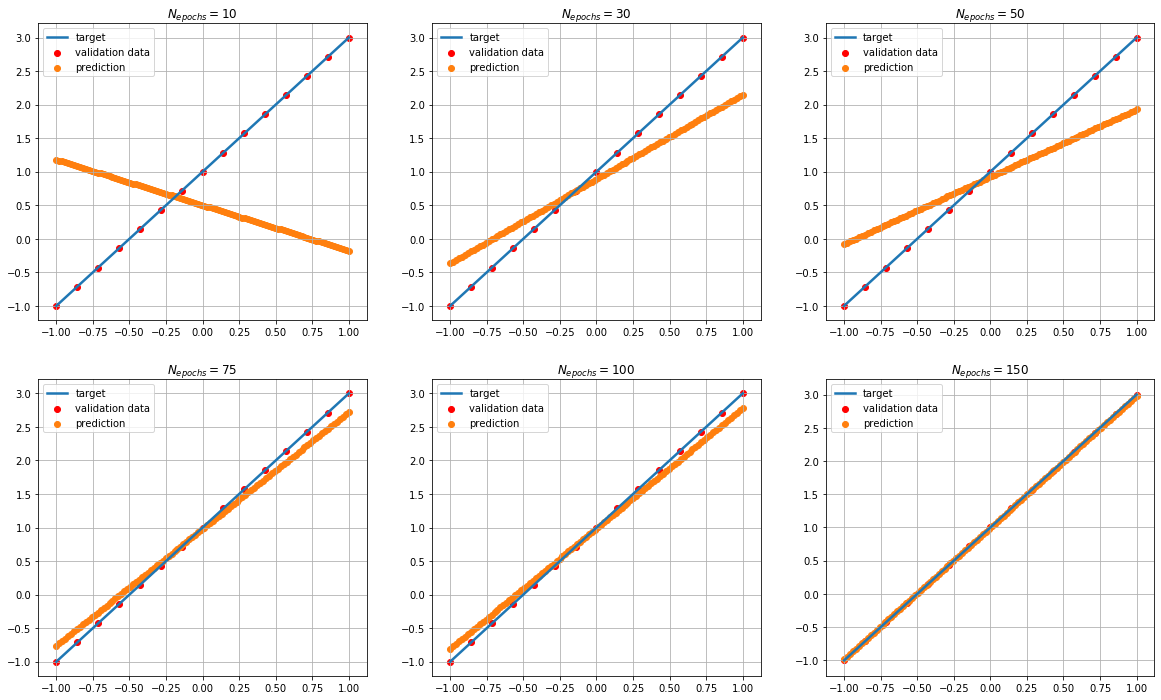

In [34]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def target(x):
    return 2*x + 1

plt.figure(figsize=(20, 12))
sub = [231, 232, 233, 234, 235, 236]
NN = ['10', '30', '50', '75', '100', '150']

sigma = 0
np.random.seed(0)
x_valid = np.linspace(-1, 1, 15)
y_valid = np.random.normal( target(x_valid), sigma )
x_predicted = np.linspace(-1, 1, 100)

for i in range(6):
    savedpath = "Code/exercise1/modelNep" + str(NN[i])
    model = tf.keras.models.load_model(filepath=savedpath)
    y_predicted = model.predict(x_predicted).reshape(-1)

    plt.subplot(sub[i])
    title = "$N_{epochs} = " + str(NN[i]) + "$"
    plt.title(title)
    plt.scatter(x_valid, y_valid, color='r', label='validation data') #dati per validazione    
    plt.scatter(x_predicted, y_predicted, color='tab:orange', label='prediction') #predizione NN
    plt.plot(x_predicted, target(x_predicted), label='target', lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

### <font color='blue'> Training data </font> 
Valuto il comportamento della regressione lineare variando il numero di dati di training. Per ogni grafico ho utilizzato $30$ epoche e $15$ dati di validazione in assenza di rumore.
I grafici ottenuti mostrano che la predizione della rete neurale diventa precisa utilizzando un insieme grande di dati di training in input.

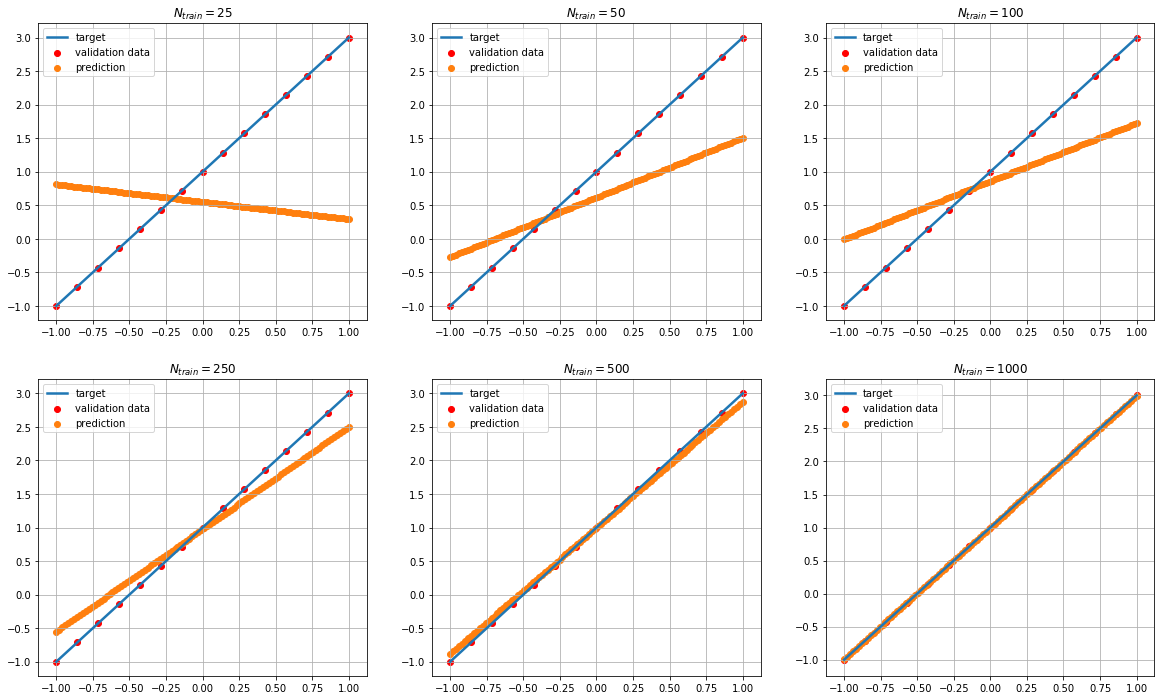

In [33]:
def target(x):
    return 2*x + 1

plt.figure(figsize=(20, 12))
sub = [231, 232, 233, 234, 235, 236]
NN = [25, 50, 100, 250, 500, 1000]

sigma = 0
np.random.seed(0)
x_valid = np.linspace(-1, 1, 15)
y_valid = np.random.normal( target(x_valid), sigma )
x_predicted = np.linspace(-1, 1, 100)

for i in range(6):
    savedpath = "Code/exercise1/modelNtrain" + str(NN[i])
    model = tf.keras.models.load_model(filepath=savedpath)
    y_predicted = model.predict(x_predicted).reshape(-1)

    plt.subplot(sub[i])
    title = "$N_{train} = " + str(NN[i]) + "$"
    plt.title(title)
    plt.scatter(x_valid, y_valid, color='r', label='validation data') #dati per validazione    
    plt.scatter(x_predicted, y_predicted, color='tab:orange', label='prediction') #predizione NN
    plt.plot(x_predicted, target(x_predicted), label='target', lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

### <font color='blue'> Rumore </font> 
Valuto il comportamento della regressione lineare introducendo del rumore nei dati di validazione.
Per ogni grafico ho utilizzato $100$ epoche, $1000$ dati di training e $15$ dati di validazione.
I grafici ottenuti mostrano che, anche in presenza di rumore, utilizzando un numero elevato di dati e di iterazioni la predizione della rete neurale rimane precisa.

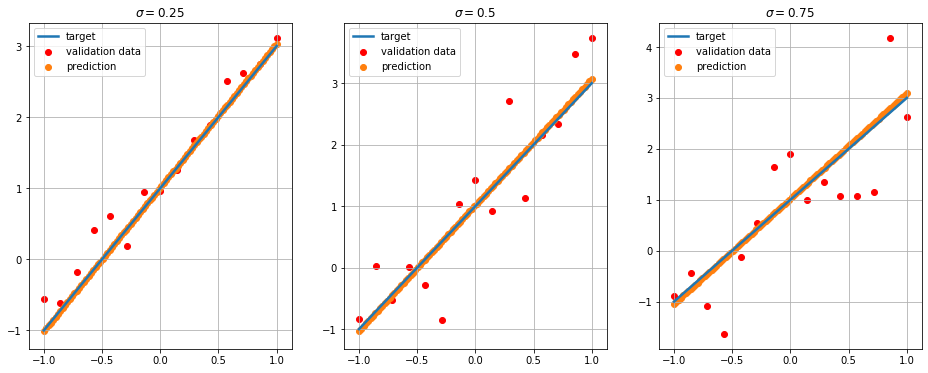

In [39]:
def target(x):
    return 2*x + 1

NN = [0.25, 0.50, 0.75]
sub = [131, 132, 133]
plt.figure(figsize=(16, 6))

np.random.seed(0)
x_valid = np.linspace(-1, 1, 15)
x_predicted = np.linspace(-1, 1, 100)

for i in range(3):
    sigma = NN[i]
    y_valid = np.random.normal( target(x_valid), sigma )
    savedpath = "Code/exercise1/modelsigma" + str(sigma)
    model = tf.keras.models.load_model(filepath=savedpath)
    y_predicted = model.predict(x_predicted).reshape(-1)

    plt.subplot(sub[i])
    title = "$\sigma = " + str(NN[i]) + "$"
    plt.title(title)
    plt.scatter(x_valid, y_valid, color='r', label='validation data') #dati per validazione    
    plt.scatter(x_predicted, y_predicted, color='tab:orange', label='prediction') #predizione NN
    plt.plot(x_predicted, target(x_predicted), label='target', lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

## Exercise 11.2

- Nepochs = 150
- Ntrain = 1000
- sigma = 0.20

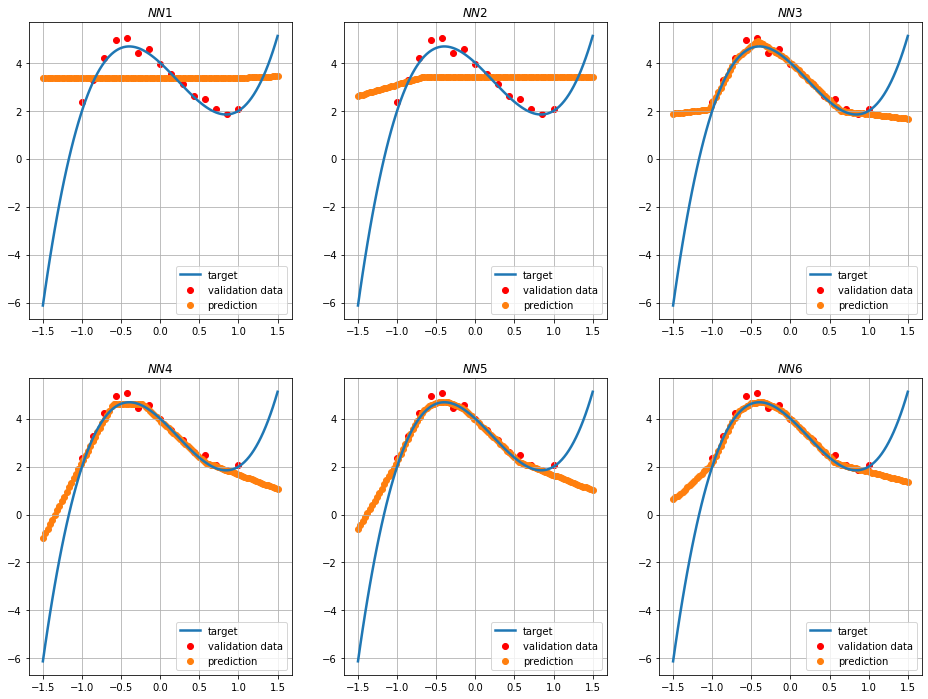

In [3]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def target(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

plt.figure(figsize=(16, 12))
sub = [231, 232, 233, 234, 235, 236]
NN = ['NN1', 'NN2', 'NN3', 'NN4', 'NN5', 'NN6']

sigma = 0.2
np.random.seed(0)
x_valid = np.linspace(-1, 1, 15)
y_valid = np.random.normal( target(x_valid), sigma )
x_predicted = np.linspace(-1.5, 1.5, 100)

for i in range(6):
    savedpath = "Code/exercise2/model" + str(NN[i])
    model = tf.keras.models.load_model(filepath=savedpath)
    y_predicted = model.predict(x_predicted).reshape(-1)

    plt.subplot(sub[i])
    title = "$" + str(NN[i]) + "$"
    plt.title(title)
    plt.scatter(x_valid, y_valid, color='r', label='validation data') #dati per validazione    
    plt.scatter(x_predicted, y_predicted, color='tab:orange', label='prediction') #predizione NN
    plt.plot(x_predicted, target(x_predicted), label='target', lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

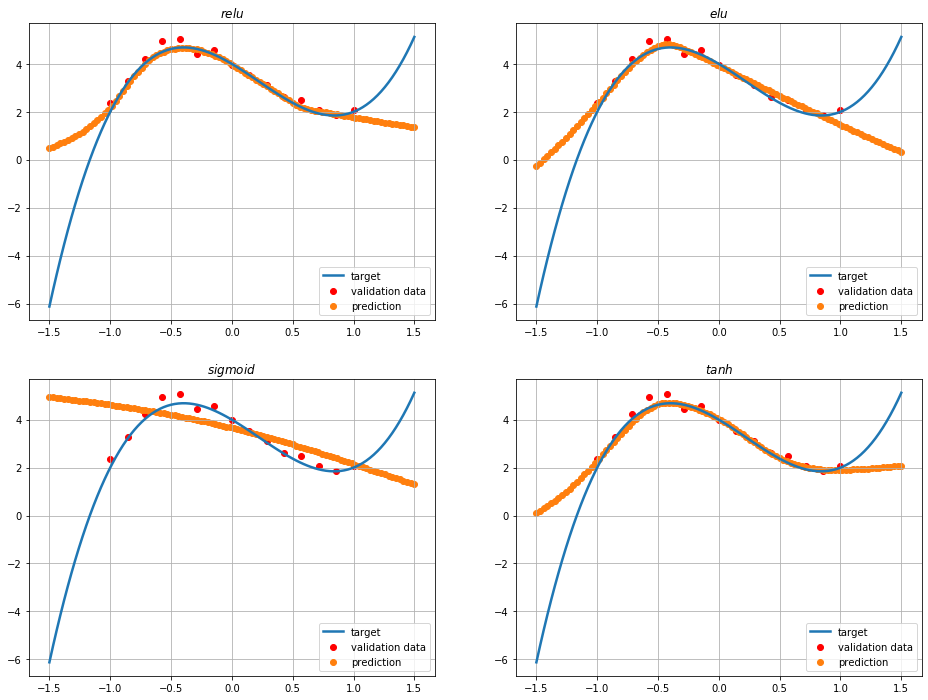

In [21]:
def target(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

plt.figure(figsize=(16, 12))
sub = [221, 222, 223, 224]
NN = ['relu', 'elu', 'sigmoid', 'tanh']

sigma = 0.2
np.random.seed(0)
x_valid = np.linspace(-1, 1, 15)
y_valid = np.random.normal( target(x_valid), sigma )
x_predicted = np.linspace(-1.5, 1.5, 100)

for i in range(4):
    savedpath = "Code/exercise2/model" + str(NN[i])
    model = tf.keras.models.load_model(filepath=savedpath)
    y_predicted = model.predict(x_predicted).reshape(-1)

    plt.subplot(sub[i])
    title = "$" + str(NN[i]) + "$"
    plt.title(title)
    plt.scatter(x_valid, y_valid, color='r', label='validation data') #dati per validazione    
    plt.scatter(x_predicted, y_predicted, color='tab:orange', label='prediction') #predizione NN
    plt.plot(x_predicted, target(x_predicted), label='target', lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

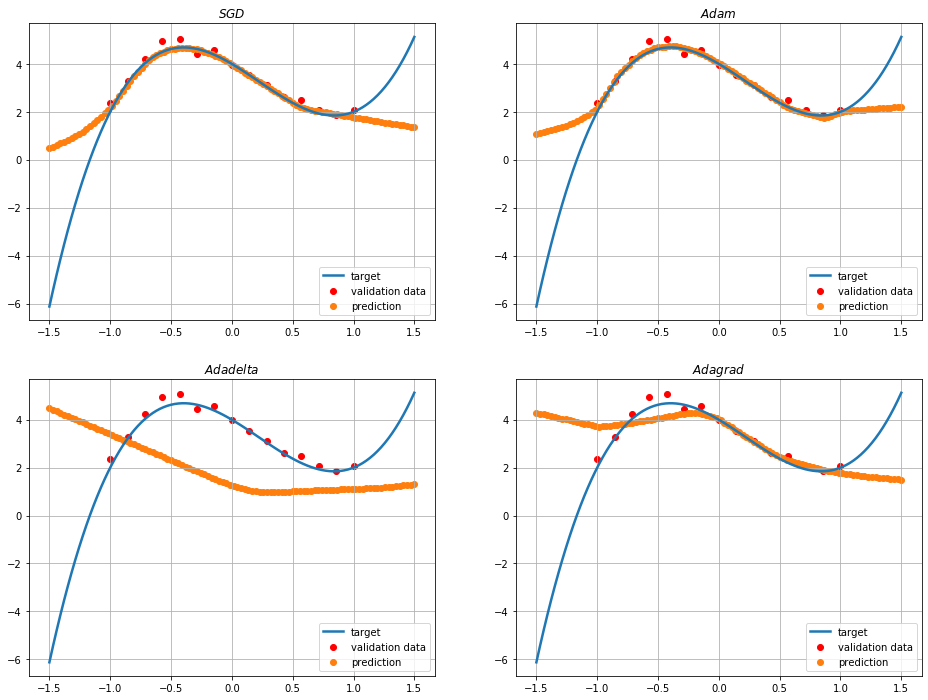

In [6]:
def target(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

plt.figure(figsize=(16, 12))
sub = [221, 222, 223, 224]
NN = ['relu', 'Adam', 'Adadelta', 'Adagrad']
title = ['SGD', 'Adam', 'Adadelta', 'Adagrad']


sigma = 0.2
np.random.seed(0)
x_valid = np.linspace(-1, 1, 15)
y_valid = np.random.normal( target(x_valid), sigma )
x_predicted = np.linspace(-1.5, 1.5, 100)

for i in range(4):
    savedpath = "Code/exercise2/model" + str(NN[i])
    model = tf.keras.models.load_model(filepath=savedpath)
    y_predicted = model.predict(x_predicted).reshape(-1)

    plt.subplot(sub[i])
    plt.title("$" + str(title[i]) + "$")
    plt.scatter(x_valid, y_valid, color='r', label='validation data') #dati per validazione    
    plt.scatter(x_predicted, y_predicted, color='tab:orange', label='prediction') #predizione NN
    plt.plot(x_predicted, target(x_predicted), label='target', lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

## Exercise 11.3